In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA For application_train Dataset

In [2]:
df_raw = pd.read_csv('application_train.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
df_raw

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df_raw['SK_ID_CURR'].duplicated().sum()

0

In [5]:
#Selecting columns that will be used in analysis

cols_to_include = ['SK_ID_CURR','TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                  'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                  'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                  'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                  'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
                  'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 
                  'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']

In [6]:
df = df_raw.copy()
df = df[cols_to_include]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

## Missing Values

In [8]:
cols_with_missing = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for col in cols_with_missing:
    print(f'Feature {col} : {np.round(df[col].isnull().mean() * 100, 4)}% Missing Values')

Feature AMT_ANNUITY : 0.0039% Missing Values
Feature AMT_GOODS_PRICE : 0.0904% Missing Values
Feature NAME_TYPE_SUITE : 0.4201% Missing Values
Feature OCCUPATION_TYPE : 31.3455% Missing Values


Since there are many missing values, we need to see the relationship between missing values and target feature

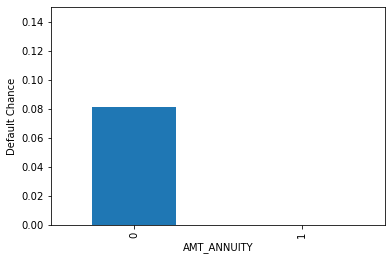

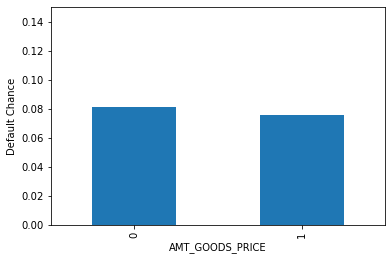

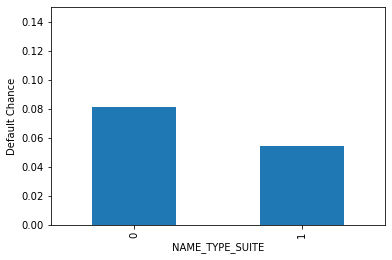

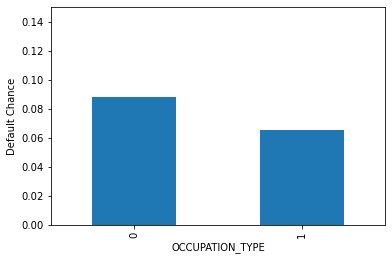

In [9]:
for col in cols_with_missing:
    data = df.copy()
    data[col] = np.where(data[col].isnull(), 1, 0)
    
    data = data.groupby(col)['TARGET'].mean().plot.bar()
    plt.ylim(0,0.15)
    plt.ylabel('Default Chance')
    plt.show()

## Numerical Features

In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' 
                      and feature not in ['SK_ID_CURR', 'TARGET']]

print(f'Number of numerical features : {len(numerical_features)}')

Number of numerical features : 24


In [11]:
df[numerical_features].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1


### Discrete Features

In [12]:
discrete_features = [feature for feature in numerical_features if df[feature].nunique() < 25]

print(f'Number of discrete features: {len(discrete_features)}')

Number of discrete features: 15


In [13]:
df[discrete_features].head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0
2,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0
3,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0
4,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1


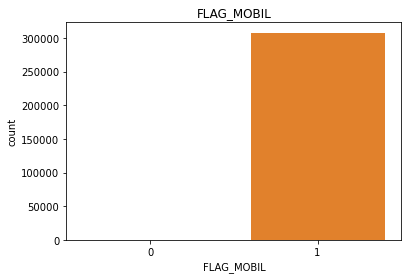

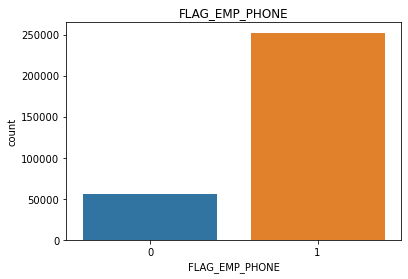

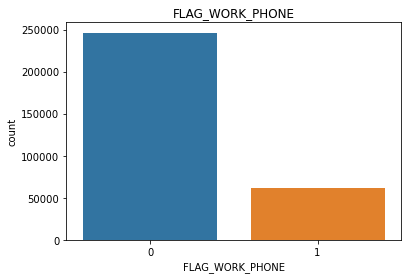

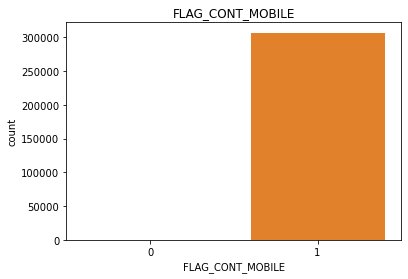

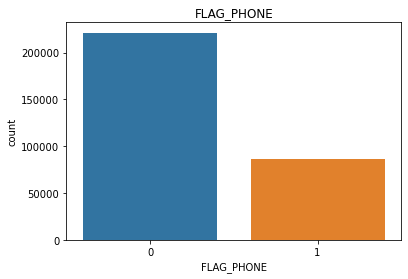

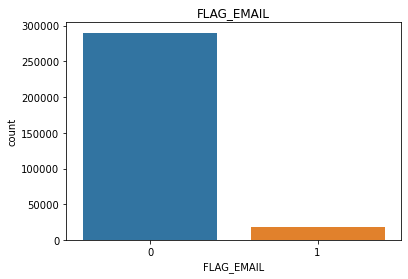

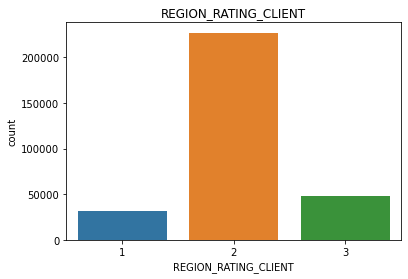

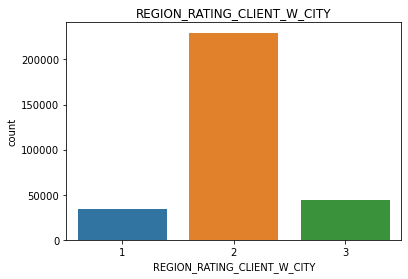

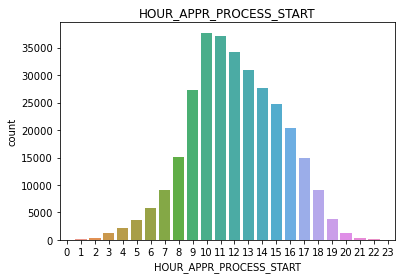

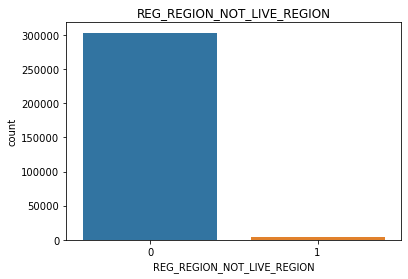

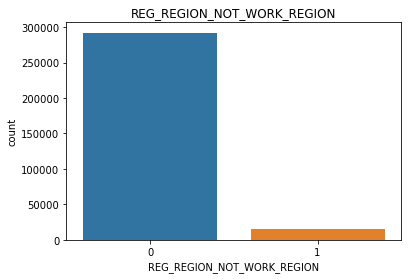

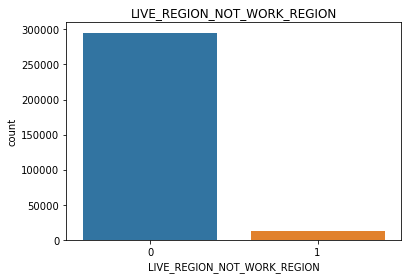

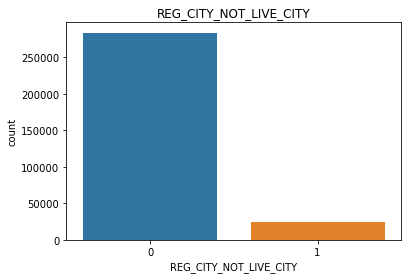

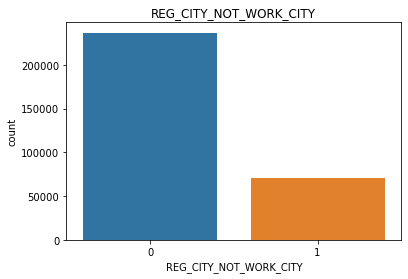

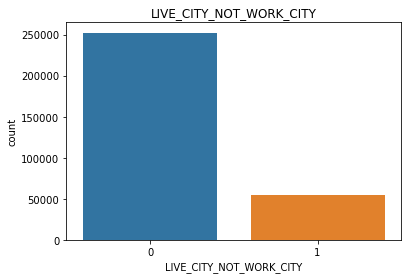

In [14]:
### Distribution of disrete features

for feature in discrete_features:
    sns.countplot(x = df[feature])
    plt.title(feature)
    plt.show()

Some discrete features has low variances

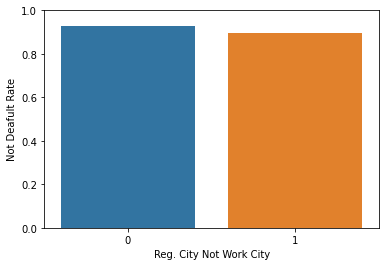

In [15]:
## Relationship between REG_CITY_NOT_WORK_CITY and TARGET

data = df.copy()
data['TARGET'] = data['TARGET'].apply(lambda x: 1 if x == 0 else 0)

dplot = data.groupby('REG_CITY_NOT_WORK_CITY')['TARGET'].mean().reset_index()
sns.barplot(data = dplot, x = 'REG_CITY_NOT_WORK_CITY', y = 'TARGET')
plt.ylim(0,1)
plt.xlabel('Reg. City Not Work City')
plt.ylabel('Not Deafult Rate')
plt.show()

In [16]:
## Continuous Features

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

print(f'Number of continuous features : {len(continuous_features)}')

Number of continuous features : 9


In [17]:
df[continuous_features].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458


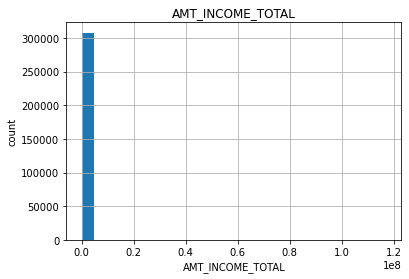

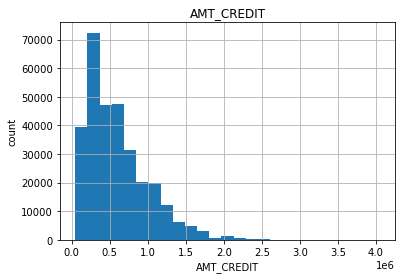

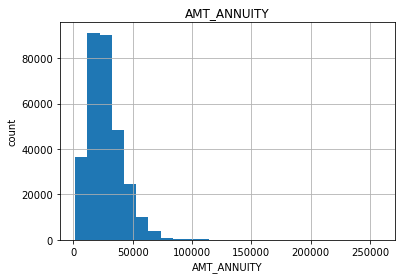

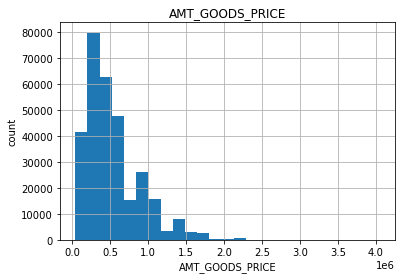

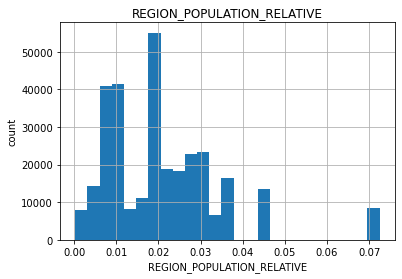

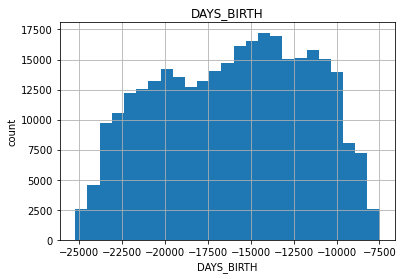

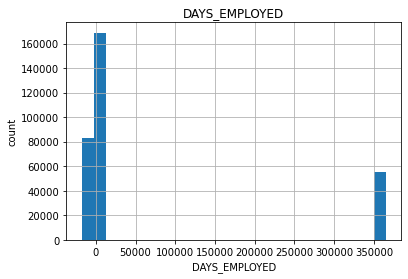

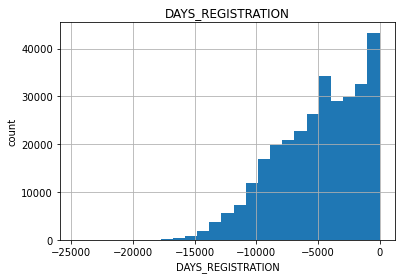

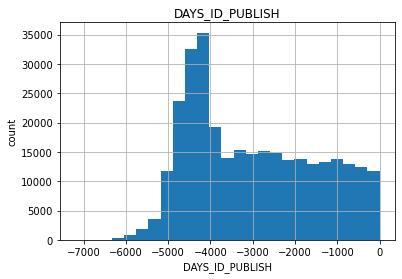

In [18]:
### Distribution of continuous features

for feature in continuous_features:
    data = df.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

Almost all continuous features are not normally distributed and there are some outliers

## Outliers

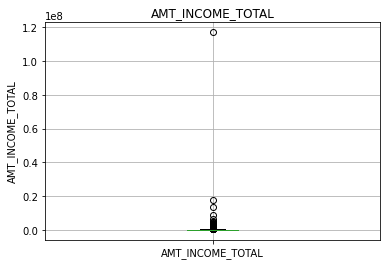

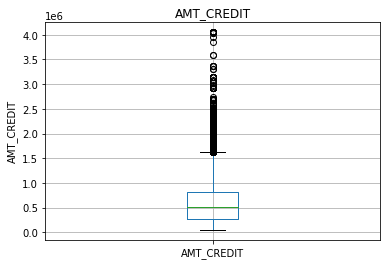

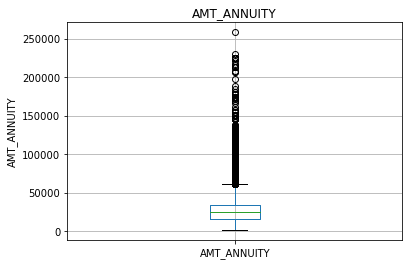

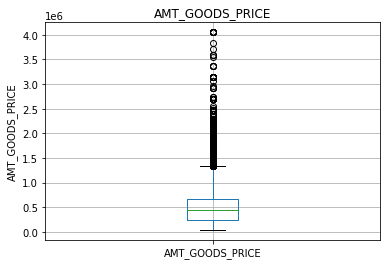

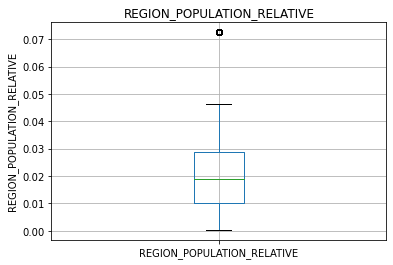

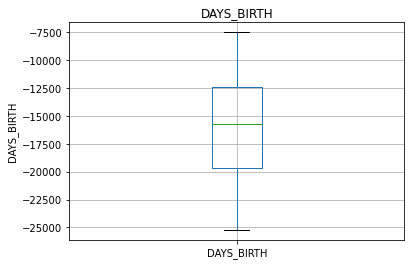

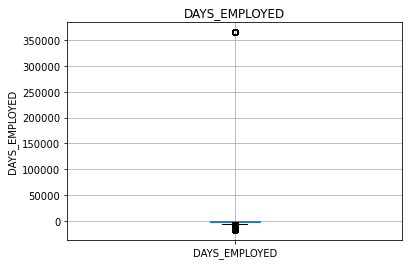

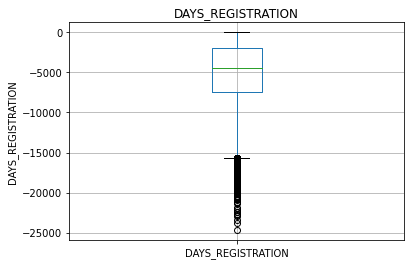

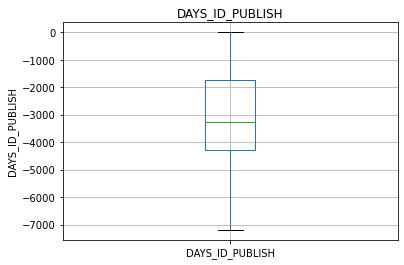

In [19]:
for feature in continuous_features:
    data = df.copy()
    
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

There are many outliers that we need to handle

## Categorical Features

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f'number of categorical features : {len(categorical_features)}')

number of categorical features : 12


In [21]:
df[categorical_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [22]:
### Check number of categories for each categorical feature

for feature in categorical_features:
    print(f'Feature {feature} has {df[feature].nunique()} categories')

Feature NAME_CONTRACT_TYPE has 2 categories
Feature CODE_GENDER has 3 categories
Feature FLAG_OWN_CAR has 2 categories
Feature FLAG_OWN_REALTY has 2 categories
Feature NAME_TYPE_SUITE has 7 categories
Feature NAME_INCOME_TYPE has 8 categories
Feature NAME_EDUCATION_TYPE has 5 categories
Feature NAME_FAMILY_STATUS has 6 categories
Feature NAME_HOUSING_TYPE has 6 categories
Feature OCCUPATION_TYPE has 18 categories
Feature WEEKDAY_APPR_PROCESS_START has 7 categories
Feature ORGANIZATION_TYPE has 58 categories


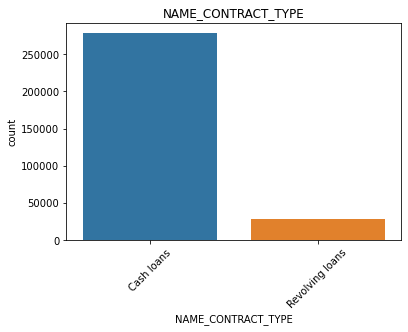

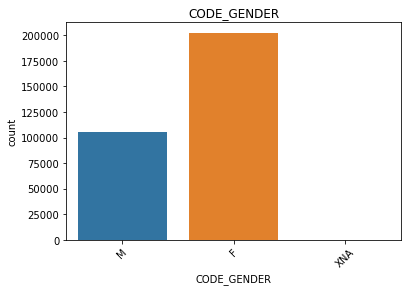

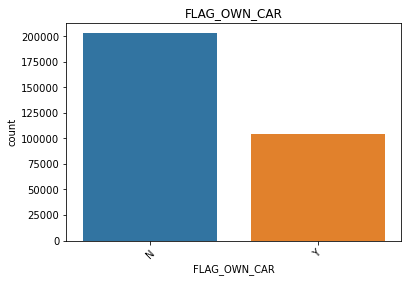

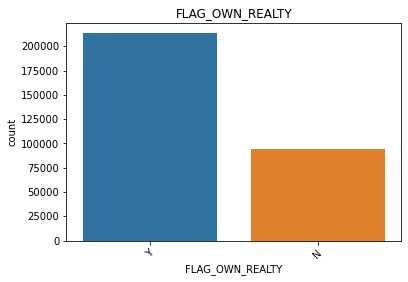

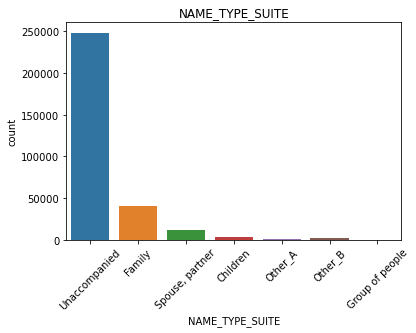

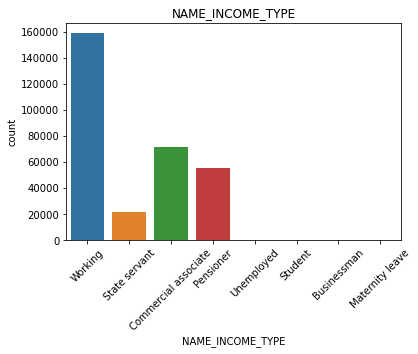

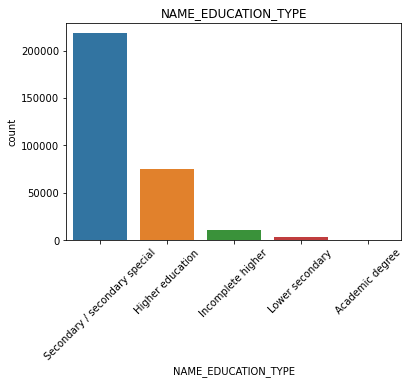

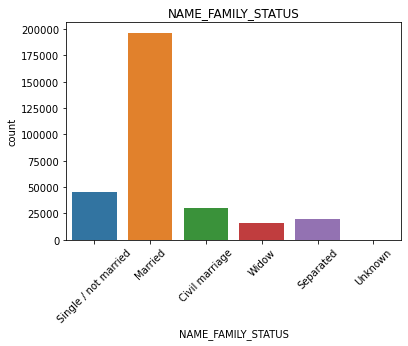

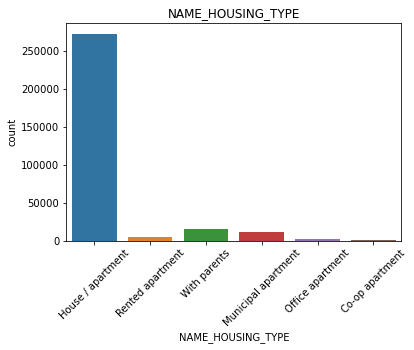

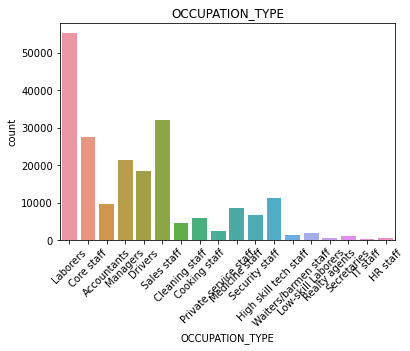

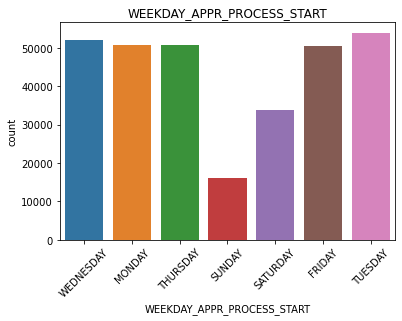

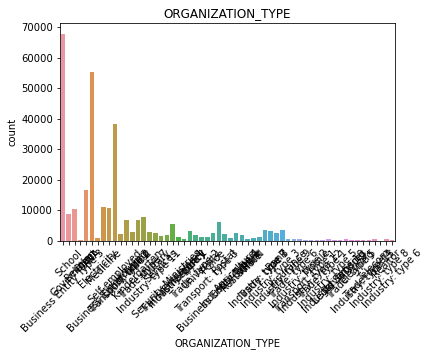

In [23]:
### Categorical Features Distribution
for feature in categorical_features:
    data = df.copy()
    
    sns.countplot(x = data[feature])
    plt.title(feature)
    plt.xticks(rotation = '45')
    plt.show()

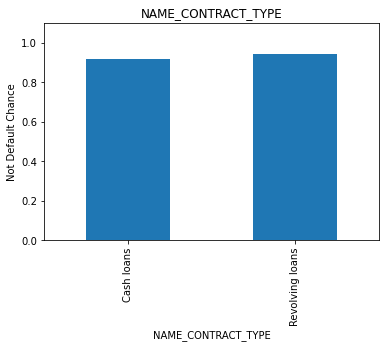

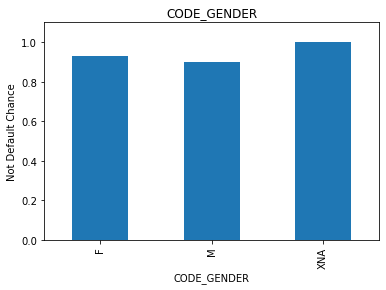

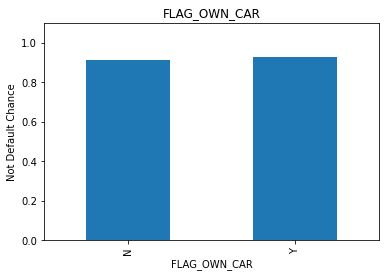

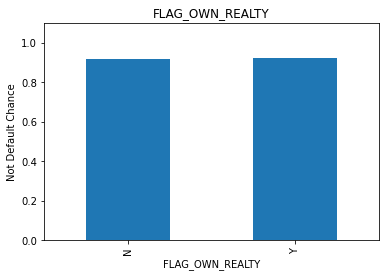

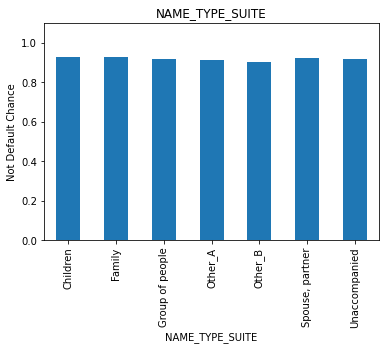

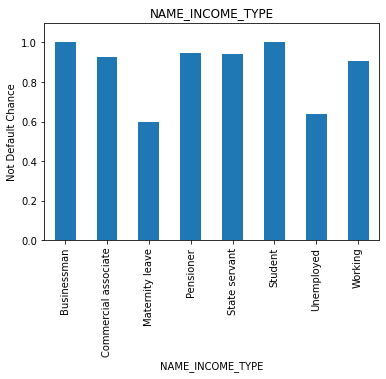

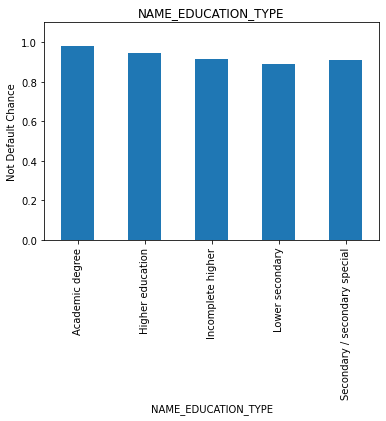

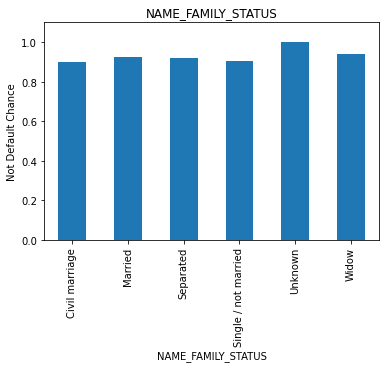

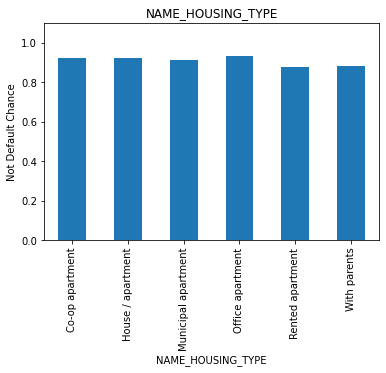

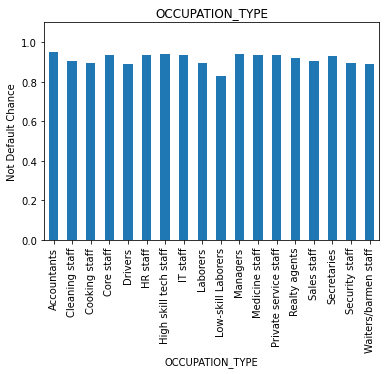

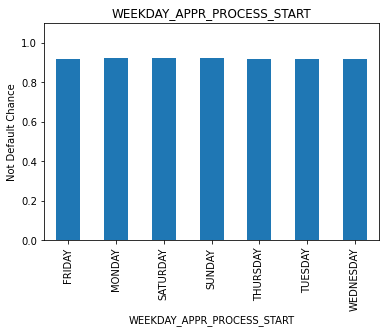

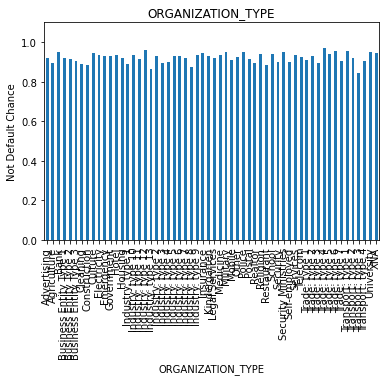

In [24]:
### Relationship between categorical features with target feature

for feature in categorical_features:
    data = df.copy()
    data['TARGET'] = data['TARGET'].apply(lambda x: 1 if x == 0 else 0)
    
    data.groupby(feature)['TARGET'].mean().plot.bar()
    plt.title(feature)
    plt.ylim(0,1.1)
    plt.ylabel('Not Default Chance')
    plt.show()

## Make Visualisation For Insights

In [90]:
dplot = df.copy()
dplot['NAME_EDUCATION_TYPE'] = dplot['NAME_EDUCATION_TYPE'].apply(lambda x: 
                                                                  'Secondary' if x == 'Secondary / secondary special' else x)
dplot['TARGET'] = dplot['TARGET'].apply(lambda x: 1 if x == 0 else 0)

In [98]:
cnt1 = dplot.groupby('NAME_EDUCATION_TYPE')['TARGET'].count()
cnt1 = cnt1.sort_values(ascending=False)

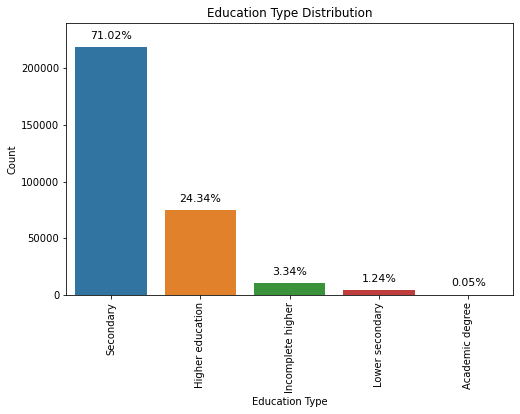

In [104]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = dplot, order = dplot['NAME_EDUCATION_TYPE'].value_counts().index)
for i in range(len(cnt1)):
    bar1.text(i, cnt1[i] + 10000, str(f'{np.round(cnt1[i]/len(dplot) * 100, 2)}%'),
            fontdict = dict(color = 'black', fontsize = 11),
            horizontalalignment = 'center',
            verticalalignment = 'center')
plt.xticks(rotation = 'vertical')
plt.ylim(0, 240000)
plt.title('Education Type Distribution')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.show()

In [66]:
cnt = df.groupby('NAME_INCOME_TYPE')['TARGET'].count()
cnt = cnt.sort_values(ascending=False)

pct = np.round(df.groupby('NAME_INCOME_TYPE')['TARGET'].count()/len(df) * 100, 4)
pct = pct.sort_values(ascending = False)

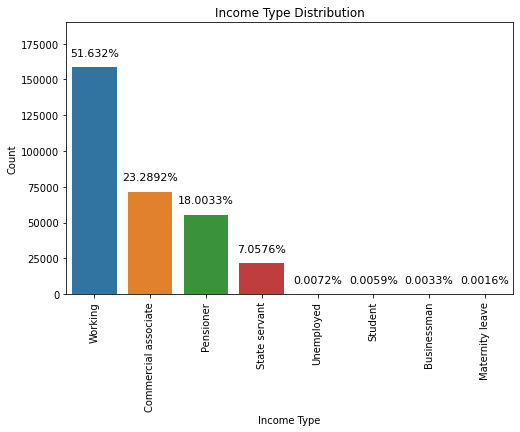

In [87]:
plt.figure(figsize = (8,5))
bar = sns.countplot(x = 'NAME_INCOME_TYPE', data = df, order = df['NAME_INCOME_TYPE'].value_counts().index)
for i in range(len(pct)):
    bar.text(i, cnt[i] + 10000, str(f'{pct[i]}%'),
            fontdict = dict(color = 'black', fontsize = 11),
            horizontalalignment = 'center',
            verticalalignment = 'center')
plt.xticks(rotation = 'vertical')
plt.ylim(0, 190000)
plt.title('Income Type Distribution')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()

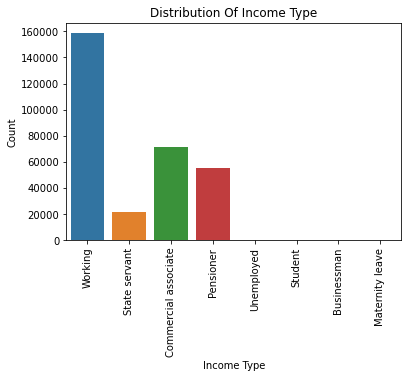

In [27]:

plt.title('Distribution Of Income Type')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation = 'vertical')
plt.show()

In [121]:
mean1 = dplot.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

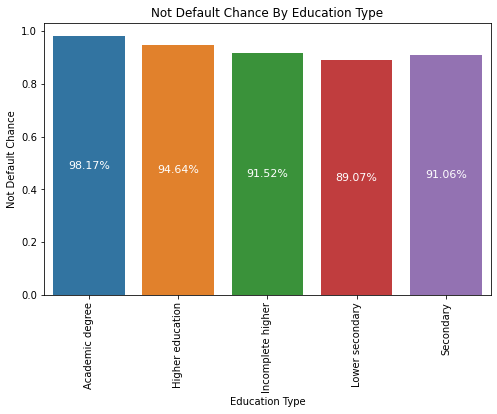

In [123]:
plt.figure(figsize = (8,5))
bar3 = sns.barplot(data = mean1.reset_index(), x = 'NAME_EDUCATION_TYPE', y = 'TARGET')
for i in range(len(mean1)):
    bar3.text(i, mean1[i]/2, str(f'{np.round(mean1[i] * 100, 2)}%'),
            fontdict = dict(color = 'white', fontsize = 11),
            horizontalalignment = 'center',
            verticalalignment = 'center')
plt.xticks(rotation = 'vertical')
plt.title('Not Default Chance By Education Type')
plt.xlabel('Education Type')
plt.ylabel('Not Default Chance')
plt.show()